In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp-2').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [3]:

file_data  = spark.read.csv(r'D:\Code_Place\Data-Science\Scikit Learn\dataset_2\rba-dataset.csv', inferSchema=True,header=True)
file_data.printSchema()


root
 |-- index: integer (nullable = true)
 |-- Login Timestamp: string (nullable = true)
 |-- User ID: double (nullable = true)
 |-- Round-Trip Time [ms]: integer (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- ASN: integer (nullable = true)
 |-- User Agent String: string (nullable = true)
 |-- Browser Name and Version: string (nullable = true)
 |-- OS Name and Version: string (nullable = true)
 |-- Device Type: string (nullable = true)
 |-- Login Successful: boolean (nullable = true)
 |-- Is Attack IP: boolean (nullable = true)
 |-- Is Account Takeover: boolean (nullable = true)



In [4]:
file_data.count()

299

In [5]:
file_data.head(5)

[Row(index=0, Login Timestamp='43:30.8', User ID=-4.32448e+18, Round-Trip Time [ms]=None, IP Address='10.0.65.171', Country='NO', Region='-', City='-', ASN=29695, User Agent String='Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like Mac OS X) Gecko/20150101 Firefox/20.0.0.1618 (Chrome variation/248113', Browser Name and Version='Firefox 20.0.0.1618', OS Name and Version='iOS 13.4', Device Type='mobile', Login Successful=False, Is Attack IP=False, Is Account Takeover=False),
 Row(index=1, Login Timestamp='43:43.5', User ID=-4.32448e+18, Round-Trip Time [ms]=None, IP Address='194.87.207.6', Country='AU', Region='-', City='-', ASN=60117, User Agent String='Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus Build/JRN84D) AppleWebKit/537.36 (KHTML, like Gecko Chrome/46.0.2490.76 Mobile Safari/537.36 Browser', Browser Name and Version='Chrome Mobile 46.0.2490', OS Name and Version='Android 4.1', Device Type='mobile', Login Successful=False, Is Attack IP=False, Is Account Takeover=False),
 Row(index=2

In [7]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

In [8]:
file_data.describe().show()

+-------+-----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------+-----------------+--------------------+------------------------+-------------------+-----------+
|summary|            index|Login Timestamp|             User ID|Round-Trip Time [ms]| IP Address|Country|     Region|    City|              ASN|   User Agent String|Browser Name and Version|OS Name and Version|Device Type|
+-------+-----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------+-----------------+--------------------+------------------------+-------------------+-----------+
|  count|              299|            299|                 299|                  10|        299|    299|        299|     299|              299|                 299|                     299|                299|        299|
|   mean|            149.0|           null|-1.38340419598662...|               538.2|       null|   null|   

In [9]:
import numpy as np
import pandas as pd
df_main = file_data.toPandas()
df_main.head()

index Login Timestamp       User ID  Round-Trip Time [ms]     IP Address  \
0      0         43:30.8 -4.324480e+18                   NaN    10.0.65.171   
1      1         43:43.5 -4.324480e+18                   NaN   194.87.207.6   
2      2         43:55.9 -3.284140e+18                   NaN  81.167.144.58   
3      3         43:56.2 -4.324480e+18                   NaN  170.39.78.152   
4      4         43:59.4 -4.618850e+18                   NaN      10.0.0.47   

  Country    Region       City     ASN  \
0      NO         -          -   29695   
1      AU         -          -   60117   
2      NO  Vestland  Urangsvag   29695   
3      US         -          -  393398   
4      US  Virginia    Ashburn  398986   

                                   User Agent String  \
0  Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like ...   
1  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
2  Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) ...   
3  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
4  Mozilla/5.0  (Linux; U; Android 2.2) Build/NMA...   

          Browser Name and Version OS Name and Version Device Type  \
0              Firefox 20.0.0.1618            iOS 13.4      mobile   
1          Chrome Mobile 46.0.2490         Android 4.1      mobile   
2               Android 2.3.3.2672             iOS 7.1      mobile   
3  Chrome Mobile WebView 85.0.4183         Android 4.1      mobile   
4  Chrome Mobile WebView 85.0.4183         Android 2.2      mobile   

   Login Successful  Is Attack IP  Is Account Takeover  
0             False         False                False  
1             False         False                False  
2              True         False                False  
3             False         False                False  
4             False          True                False

In [10]:
df_main.replace(np.nan,0)


index Login Timestamp       User ID  Round-Trip Time [ms]     IP Address  \
0        0         43:30.8 -4.324480e+18                   0.0    10.0.65.171   
1        1         43:43.5 -4.324480e+18                   0.0   194.87.207.6   
2        2         43:55.9 -3.284140e+18                   0.0  81.167.144.58   
3        3         43:56.2 -4.324480e+18                   0.0  170.39.78.152   
4        4         43:59.4 -4.618850e+18                   0.0      10.0.0.47   
..     ...             ...           ...                   ...            ...   
294    294         48:07.5  1.509460e+17                   0.0    10.0.77.229   
295    295         48:09.8 -5.020360e+18                   0.0  31.172.168.14   
296    296         48:10.1  7.796450e+18                   0.0      10.0.4.50   
297    297         48:10.4 -4.803160e+18                   0.0    10.0.77.221   
298    298         48:11.0  1.086810e+18                   0.0   193.57.249.3   

    Country    Region       City     ASN  \
0        NO         -          -   29695   
1        AU         -          -   60117   
2        NO  Vestland  Urangsvag   29695   
3        US         -          -  393398   
4        US  Virginia    Ashburn  398986   
..      ...       ...        ...     ...   
294      NO         -          -   29695   
295      PL         -          -   15967   
296      NO         -          -    8478   
297      NO     Viken   Harestua   29695   
298      FR         -          -   10991   

                                     User Agent String  \
0    Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like ...   
1    Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
2    Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) ...   
3    Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
4    Mozilla/5.0  (Linux; U; Android 2.2) Build/NMA...   
..                                                 ...   
294  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...   
295  Mozilla/5.0  (iPhone; CPU iPhone OS 11_2_6 lik...   
296  Mozilla/5.0  (X11; CrOS x86_64 13729.56.0) App...   
297  Mozilla/5.0  (iPhone; CPU iPhone OS 11_2_6 lik...   
298  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...   

            Browser Name and Version   OS Name and Version Device Type  \
0                Firefox 20.0.0.1618              iOS 13.4      mobile   
1            Chrome Mobile 46.0.2490           Android 4.1      mobile   
2                 Android 2.3.3.2672               iOS 7.1      mobile   
3    Chrome Mobile WebView 85.0.4183           Android 4.1      mobile   
4    Chrome Mobile WebView 85.0.4183           Android 2.2      mobile   
..                               ...                   ...         ...   
294           Chrome 69.0.3497.17.19      Mac OS X 10.14.6     desktop   
295              Firefox 20.0.0.1618            iOS 11.2.6      mobile   
296           Chrome 69.0.3497.17.19  Chrome OS 13729.56.0     desktop   
297  Chrome Mobile WebView 85.0.4183            iOS 11.2.6      mobile   
298           Chrome 69.0.3497.17.19      Mac OS X 10.14.6     desktop   

     Login Successful  Is Attack IP  Is Account Takeover  
0               False         False                False  
1               False         False                False  
2                True         False                False  
3               False         False                False  
4               False          True                False  
..                ...           ...                  ...  
294              True         False                False  
295             False         False                False  
296              True          True                False  
297              True         False                False  
298              True         False                False  

[299 rows x 16 columns]

In [25]:
df = df_main.copy()
df.dtypes

index                         int32
Login Timestamp              object
User ID                     float64
Round-Trip Time [ms]        float64
IP Address                   object
Country                      object
Region                       object
City                         object
ASN                           int32
User Agent String            object
Browser Name and Version     object
OS Name and Version          object
Device Type                  object
Login Successful               bool
Is Attack IP                   bool
Is Account Takeover            bool
dtype: object

In [26]:
df.columns

Index(['index', 'Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover'],
      dtype='object')

In [27]:
df = df[['Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover']]

df.dtypes

df.rename(columns = {'Login Timestamp':'Login_Timestamp',
                     'User ID':'User_ID',
                     'Round-Trip Time [ms]':'RTT',
                     'IP Address':'IP',
                     'User Agent String':'UserAgentString',
                     'Browser Name and Version':'BNV',
                     'Device Type':'DT',
                     'Login Successful':'LS',
                     'OS Name and Version':'ONV',
                     'Is Attack IP':'IAI',
                     'Is Account Takeover': 'IAT'
                     }, inplace = True)
df.dtypes

Login_Timestamp     object
User_ID            float64
RTT                float64
IP                  object
Country             object
Region              object
City                object
ASN                  int32
UserAgentString     object
BNV                 object
ONV                 object
DT                  object
LS                    bool
IAI                   bool
IAT                   bool
dtype: object

In [28]:
df['Region'] = pd.Categorical(df['Region'])
df['Region'] = df.Region.cat.codes
df['City'] = pd.Categorical(df['City'])
df['City'] = df.City.cat.codes
df['UserAgentString'] = pd.Categorical(df['UserAgentString'])
df['UserAgentString'] = df.UserAgentString.cat.codes
df['BNV'] = pd.Categorical(df['BNV'])
df['BNV'] = df.BNV.cat.codes
df['ONV'] = pd.Categorical(df['ONV'])
df['ONV'] = df.ONV.cat.codes
df['DT'] = pd.Categorical(df['DT'])
df['DT'] = df.DT.cat.codes
df['IAT'] = pd.Categorical(df['IAT'])
df['IAT'] = df.IAT.cat.codes

In [29]:
df['Login_Timestamp'] = pd.Categorical(df['Login_Timestamp'])
df['Login_Timestamp'] = df.Login_Timestamp.cat.codes
df['User_ID'] = pd.Categorical(df['User_ID'])
df['User_ID'] = df.User_ID.cat.codes
df['RTT'] = pd.Categorical(df['RTT'])
df['RTT'] = df.RTT.cat.codes
df['IP'] = pd.Categorical(df['IP'])
df['IP'] = df.IP.cat.codes


In [33]:
df['LS'] = pd.Categorical(df['LS'])
df['LS'] = df.LS.cat.codes
df['IAI'] = pd.Categorical(df['IAI'])
df['IAI'] = df.IAI.cat.codes
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df.Country.cat.codes



In [34]:
df.head()

Login_Timestamp  User_ID  RTT   IP  Country  Region  City     ASN  \
0                0       47   -1   32       15       0     0   29695   
1                1       47   -1  123        1       0     0   60117   
2                2       60   -1  211       15      34    86   29695   
3                3       47   -1   98       20       0     0  393398   
4                4       46   -1    0       20      36     3  398986   

   UserAgentString  BNV  ONV  DT  LS  IAI  IAT  
0              103   50   30   1   0    0    0  
1                7   29    3   1   0    0    0  
2               65    5   35   1   1    0    0  
3               15   46    3   1   0    0    0  
4               29   46    2   1   0    1    0

In [35]:
# df['LS'] = pd.Categorical(df['LS']).apply(int)
df.dtypes

Login_Timestamp    int16
User_ID            int16
RTT                 int8
IP                 int16
Country             int8
Region              int8
City                int8
ASN                int32
UserAgentString    int16
BNV                 int8
ONV                 int8
DT                  int8
LS                  int8
IAI                 int8
IAT                 int8
dtype: object

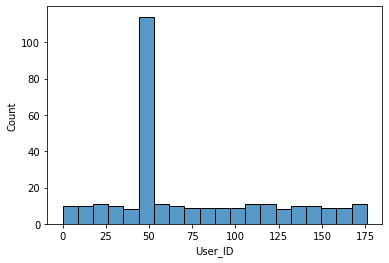

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="User_ID", bins=20)
plt.show()

In [38]:
df.columns

Index(['Login_Timestamp', 'User_ID', 'RTT', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT'],
      dtype='object')

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'DT'}>],
       [<AxesSubplot:title={'center':'LS'}>,
        <AxesSubplot:title={'center':'IAI'}>],
       [<AxesSubplot:title={'center':'IAT'}>,
        <AxesSubplot:title={'center':'City'}>]], dtype=object)

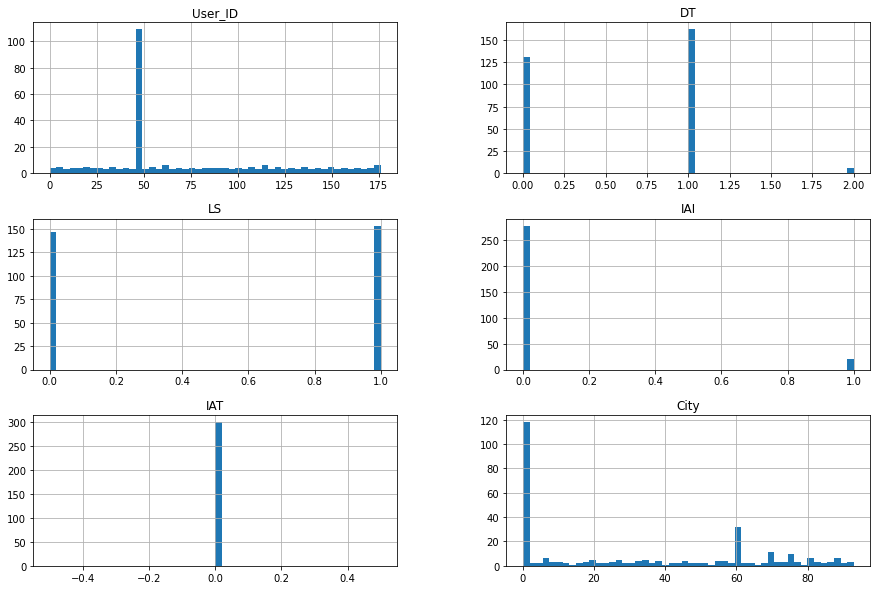

In [39]:

clist = ['User_ID','DT', 'LS', 'IAI', 'IAT','City']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [76]:
numaric_call = ['Login_Timestamp', 'User_ID', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT']
data = df[numaric_call]
data.head()

Login_Timestamp  User_ID   IP  Country  Region  City     ASN  \
0                0       47   32       15       0     0   29695   
1                1       47  123        1       0     0   60117   
2                2       60  211       15      34    86   29695   
3                3       47   98       20       0     0  393398   
4                4       46    0       20      36     3  398986   

   UserAgentString  BNV  ONV  DT  LS  IAI  IAT  
0              103   50   30   1   0    0    0  
1                7   29    3   1   0    0    0  
2               65    5   35   1   1    0    0  
3               15   46    3   1   0    0    0  
4               29   46    2   1   0    1    0

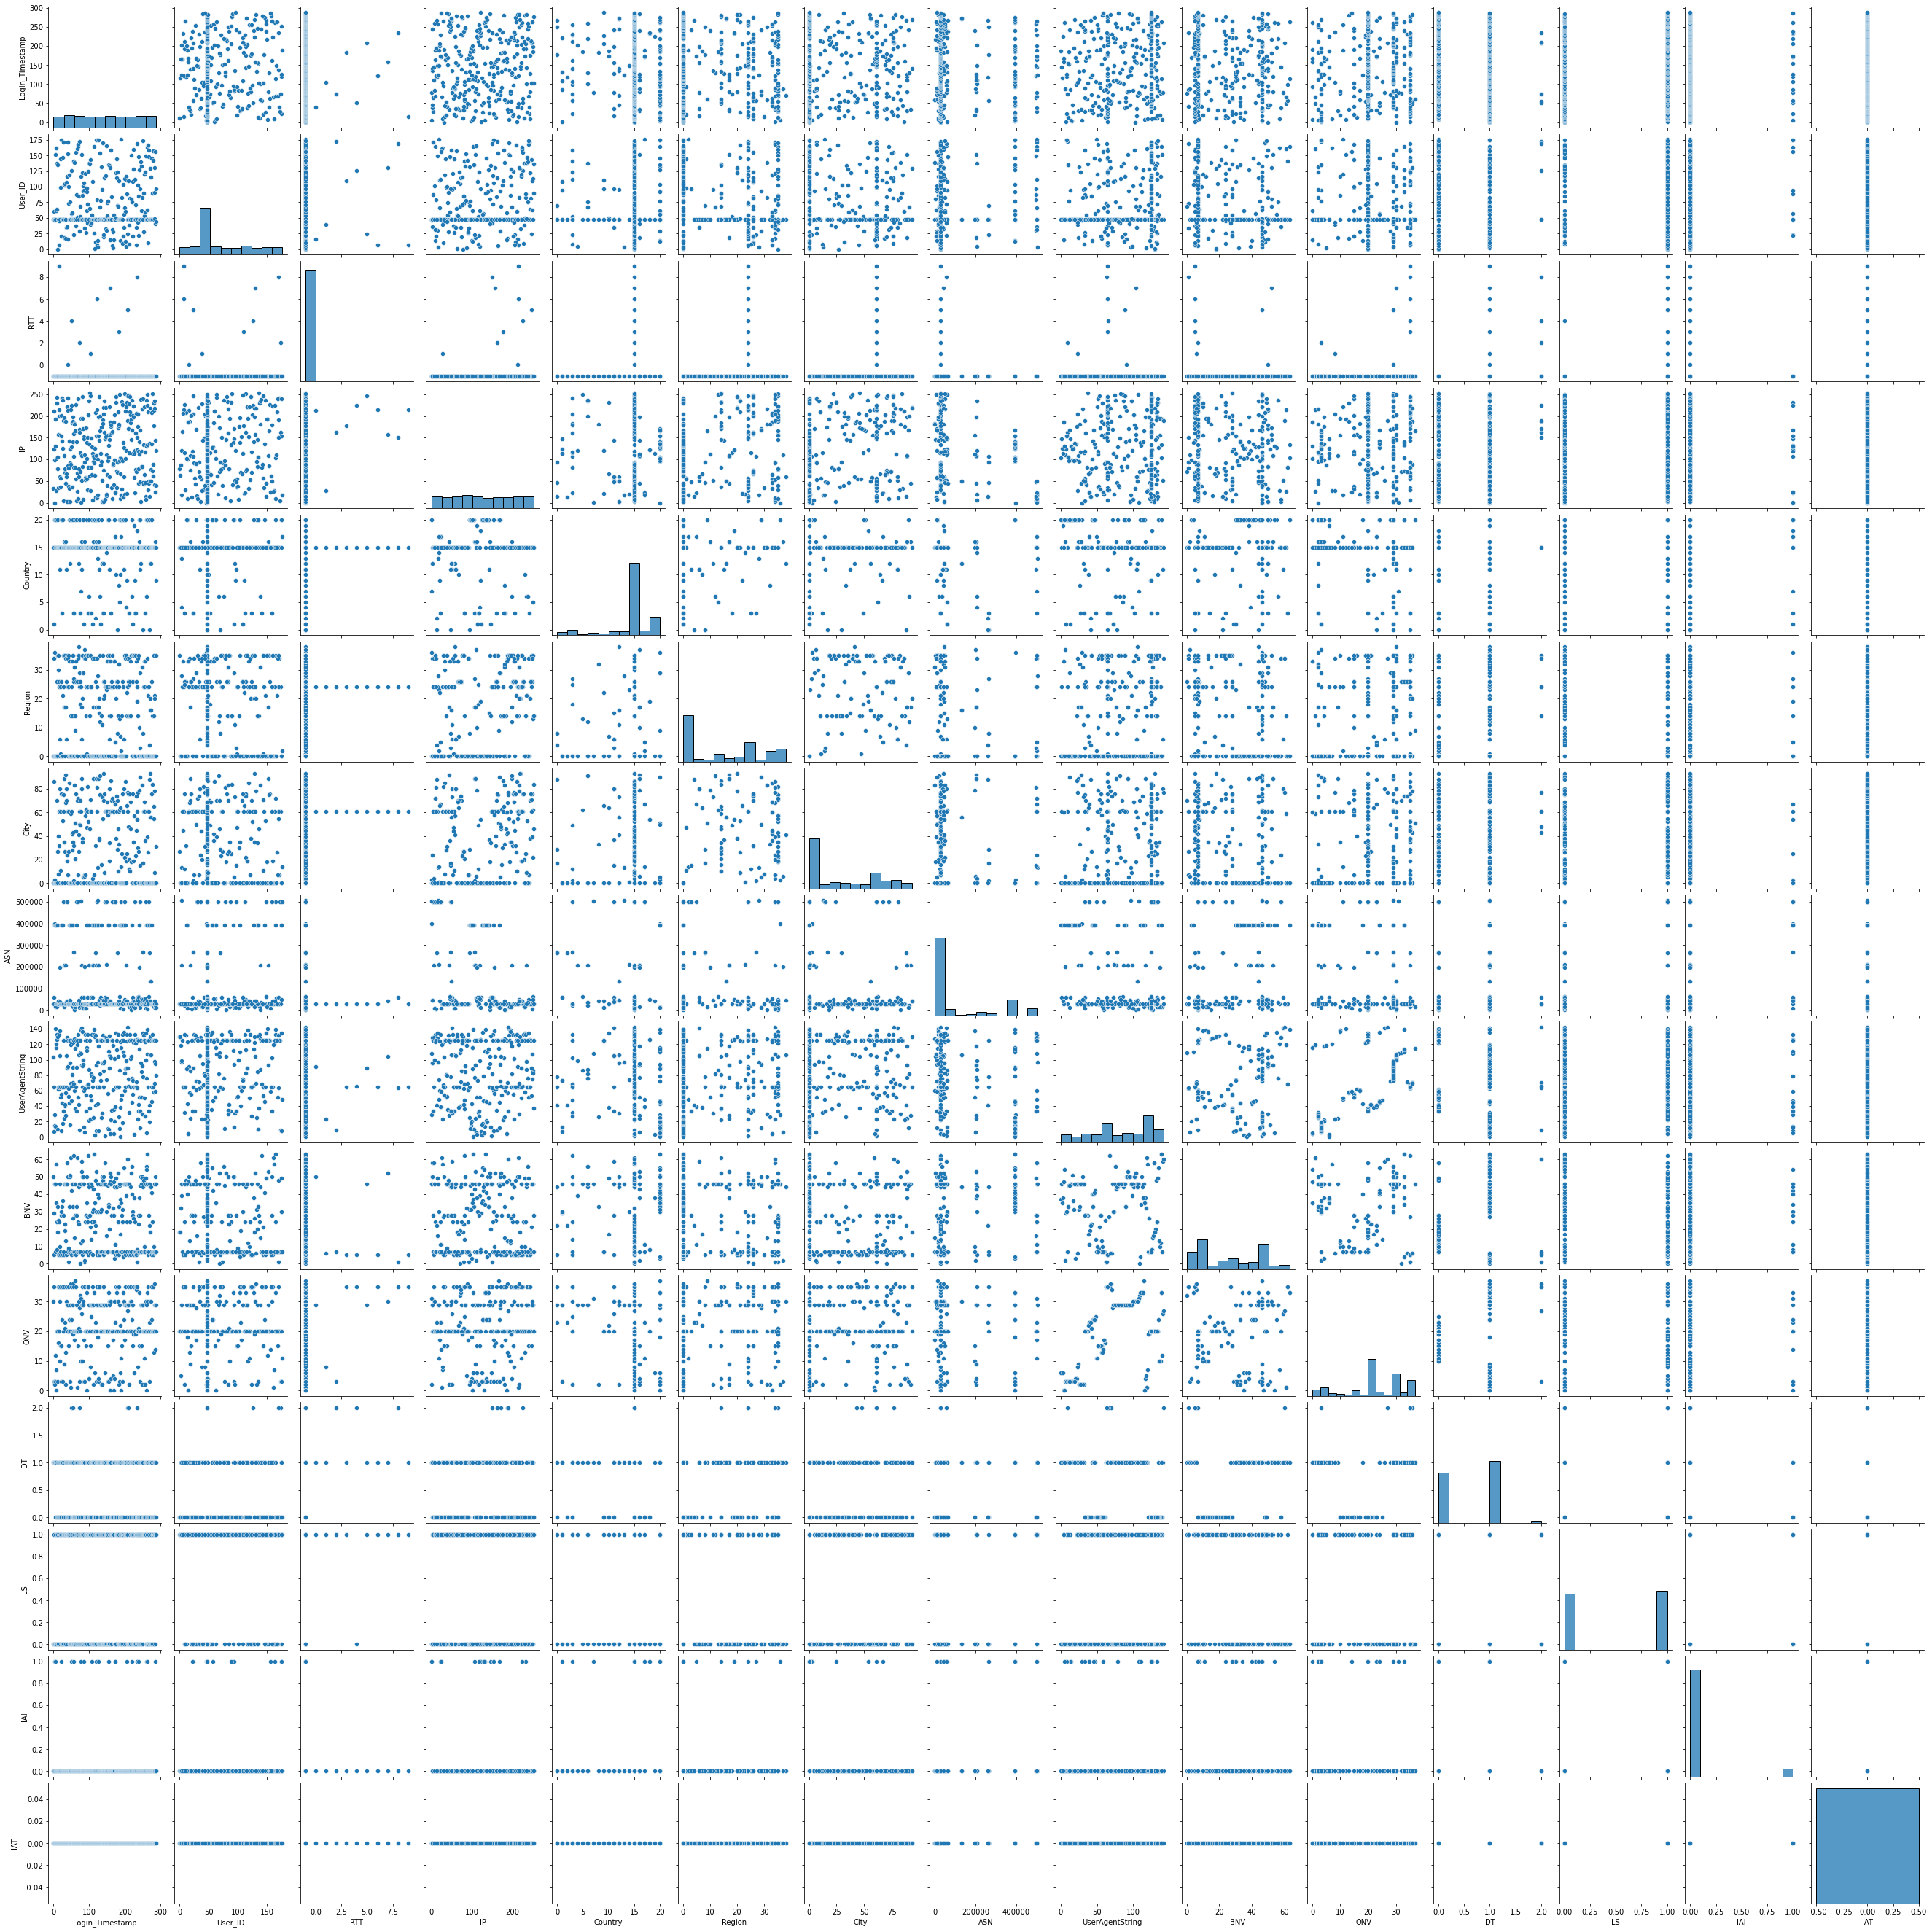

In [41]:
sns.pairplot(data=data)

In [42]:
dataset = data.copy()
dataset.isna().sum()

Login_Timestamp    0
User_ID            0
RTT                0
IP                 0
Country            0
Region             0
City               0
ASN                0
UserAgentString    0
BNV                0
ONV                0
DT                 0
LS                 0
IAI                0
IAT                0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IAI', ylabel='Density'>

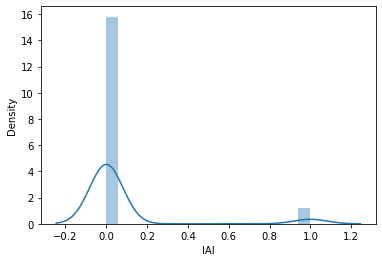

In [43]:
sns.distplot(dataset['IAI'])

In [44]:
dataset.corr()

Login_Timestamp   User_ID       RTT        IP   Country  \
Login_Timestamp         1.000000  0.027262 -0.030236  0.055640 -0.070042   
User_ID                 0.027262  1.000000  0.030461  0.100603  0.053554   
RTT                    -0.030236  0.030461  1.000000  0.139696  0.023656   
IP                      0.055640  0.100603  0.139696  1.000000  0.037924   
Country                -0.070042  0.053554  0.023656  0.037924  1.000000   
Region                 -0.089098 -0.057699  0.106479  0.230315  0.080410   
City                   -0.008235 -0.074138  0.151918  0.169129  0.009197   
ASN                    -0.061252  0.012936 -0.087903 -0.325746  0.285977   
UserAgentString         0.098364  0.093882 -0.058211  0.002573 -0.059713   
BNV                    -0.023048 -0.140312 -0.080643 -0.055420  0.019250   
ONV                     0.066770 -0.033283  0.152083  0.054901 -0.241220   
DT                     -0.079632 -0.105474  0.224382  0.093507  0.022879   
LS                      0.037802  0.308943  0.130599  0.040860 -0.015680   
IAI                     0.010460  0.028970 -0.045151 -0.037412  0.117096   
IAT                          NaN       NaN       NaN       NaN       NaN   

                   Region      City       ASN  UserAgentString       BNV  \
Login_Timestamp -0.089098 -0.008235 -0.061252         0.098364 -0.023048   
User_ID         -0.057699 -0.074138  0.012936         0.093882 -0.140312   
RTT              0.106479  0.151918 -0.087903        -0.058211 -0.080643   
IP               0.230315  0.169129 -0.325746         0.002573 -0.055420   
Country          0.080410  0.009197  0.285977        -0.059713  0.019250   
Region           1.000000  0.625551 -0.340054         0.111341 -0.219939   
City             0.625551  1.000000 -0.288782         0.070043 -0.136693   
ASN             -0.340054 -0.288782  1.000000        -0.232556  0.232859   
UserAgentString  0.111341  0.070043 -0.232556         1.000000 -0.102117   
BNV             -0.219939 -0.136693  0.232859        -0.102117  1.000000   
ONV              0.123724  0.100771 -0.254711         0.312795 -0.109604   
DT              -0.106149 -0.052814  0.116062        -0.394953  0.418982   
LS               0.211044  0.199535 -0.128814         0.161021 -0.243671   
IAI             -0.158675 -0.161816  0.282716        -0.152868  0.040805   
IAT                   NaN       NaN       NaN              NaN       NaN   

                      ONV        DT        LS       IAI  IAT  
Login_Timestamp  0.066770 -0.079632  0.037802  0.010460  NaN  
User_ID         -0.033283 -0.105474  0.308943  0.028970  NaN  
RTT              0.152083  0.224382  0.130599 -0.045151  NaN  
IP               0.054901  0.093507  0.040860 -0.037412  NaN  
Country         -0.241220  0.022879 -0.015680  0.117096  NaN  
Region           0.123724 -0.106149  0.211044 -0.158675  NaN  
City             0.100771 -0.052814  0.199535 -0.161816  NaN  
ASN             -0.254711  0.116062 -0.128814  0.282716  NaN  
UserAgentString  0.312795 -0.394953  0.161021 -0.152868  NaN  
BNV             -0.109604  0.418982 -0.243671  0.040805  NaN  
ONV              1.000000  0.215036  0.005721 -0.142793  NaN  
DT               0.215036  1.000000 -0.251820 -0.005427  NaN  
LS               0.005721 -0.251820  1.000000 -0.098076  NaN  
IAI             -0.142793 -0.005427 -0.098076  1.000000  NaN  
IAT                   NaN       NaN       NaN       NaN  NaN

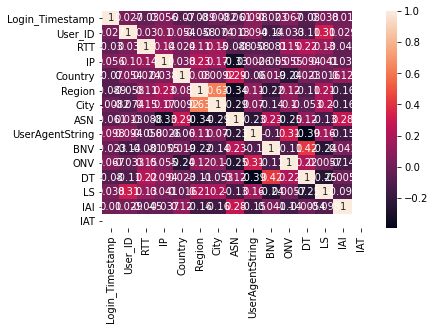

In [45]:
sns.heatmap(dataset.corr(),annot=True).figsize=(20,25)

In [46]:
data.columns

Index(['Login_Timestamp', 'User_ID', 'RTT', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT'],
      dtype='object')

In [77]:
X= data[['Login_Timestamp', 'User_ID', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAT']]
y = data['IAI']

In [79]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((209, 13), (90, 13))

In [80]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [81]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
 False]
No. of Non-Constant Features:  12


In [82]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

1
IAT


In [83]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

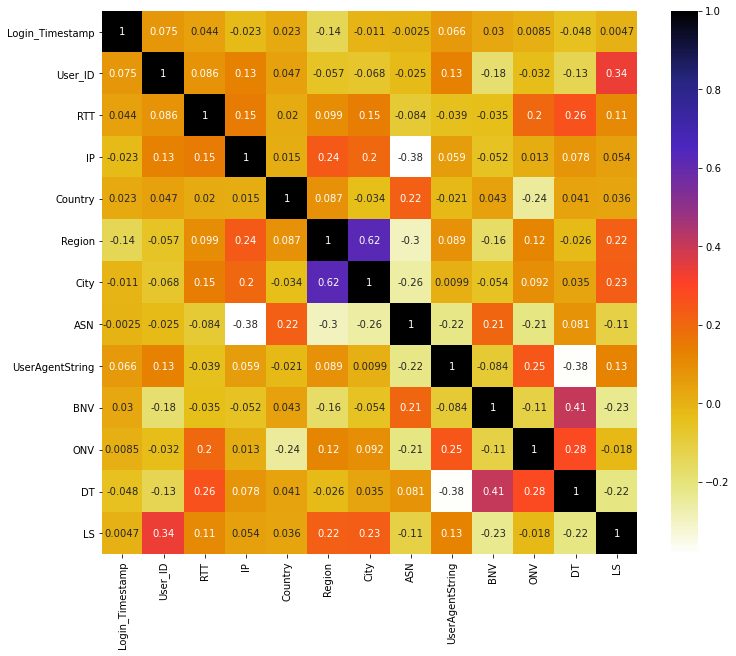

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 0


set()

In [56]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [57]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [58]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [59]:
mp=10
X_train.head(2)

Login_Timestamp  User_ID  RTT  IP  Country  Region  City     ASN  \
281              272       47   -1  49       12      16    56  132996   
44                43      119   -1  33       15      33    85   29695   

     UserAgentString  BNV  ONV  DT  LS  
281              106   44   30   1   0  
44               125    7   20   0   1

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

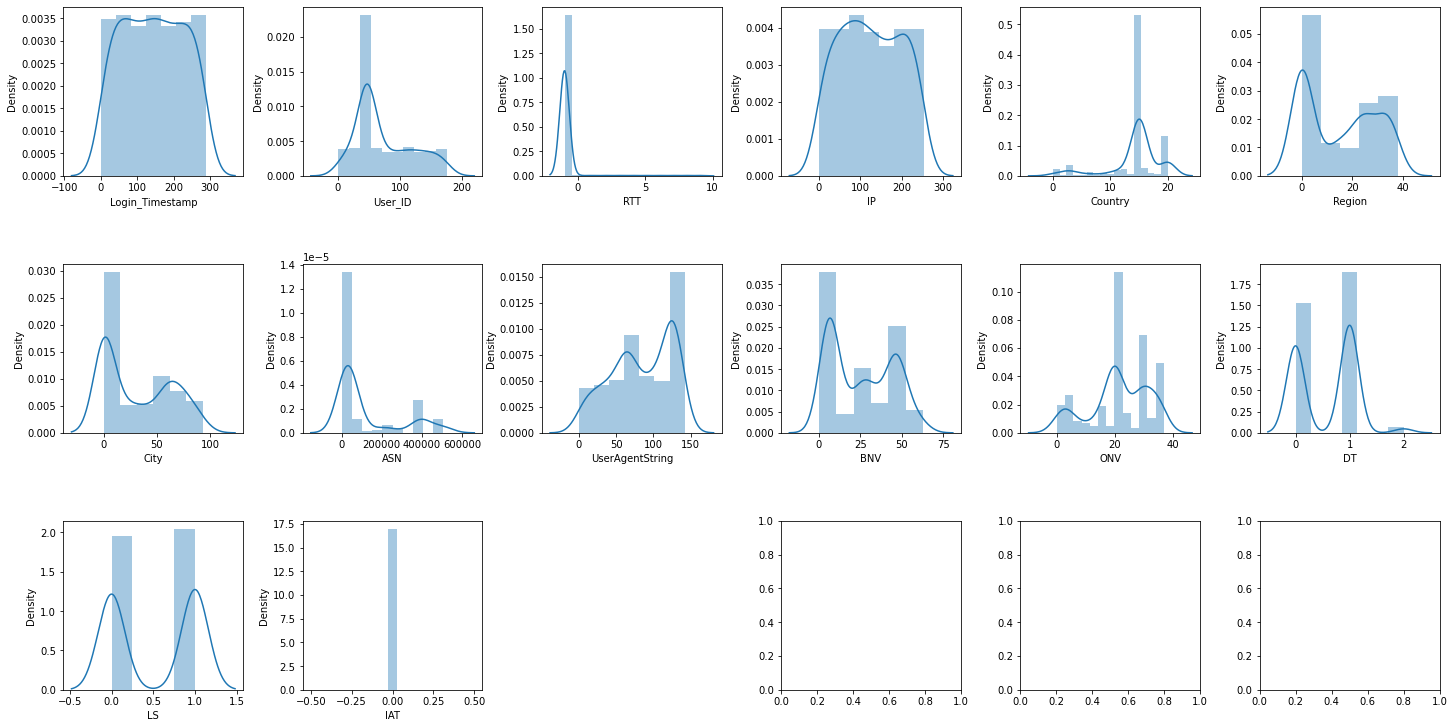

In [60]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [62]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [ ]:
### KNeighbors

In [63]:
#%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [64]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 0.01 s
time to predict: 0.01 s
total: 0.01 s


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


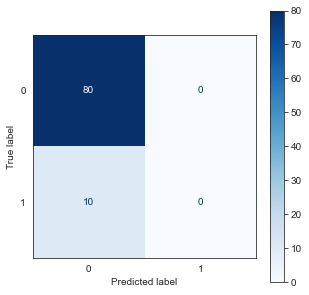

In [65]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### RandomForest

In [66]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model2 = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 341 ms


In [67]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.11%
Recall: 91.11%
Precision: 91.92%
F1-Score: 88.36%
time to train: 0.13 s
time to predict: 0.02 s
total: 0.15 s


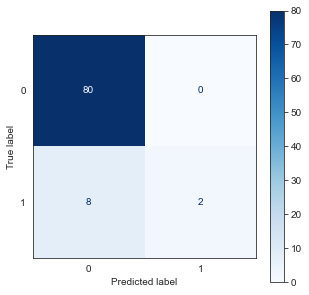

In [68]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [69]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        80
           1       1.00      0.20      0.33        10

    accuracy                           0.91        90
   macro avg       0.95      0.60      0.64        90
weighted avg       0.92      0.91      0.88        90



### DecisionTree

In [70]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 4.45 ms


In [71]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.11%
Recall: 91.11%
Precision: 91.92%
F1-Score: 88.36%
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


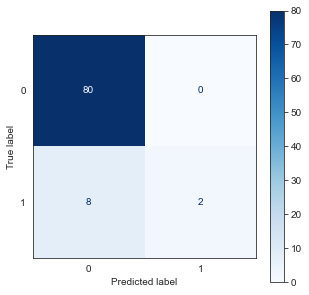

In [72]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [73]:
### Navie Bayes

In [84]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [85]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 77.78%
Recall: 77.78%
Precision: 89.53%
F1-Score: 81.48%
time to train: 0.00 s
time to predict: 0.00 s
total: 0.01 s


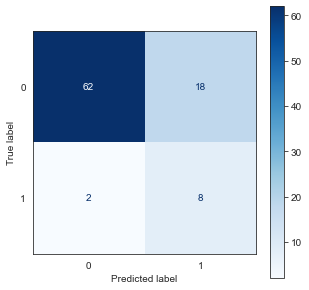

In [86]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### AdaBoostClassifier

In [87]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model5.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 154 ms


In [88]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.11%
Recall: 91.11%
Precision: 89.99%
F1-Score: 89.37%
time to train: 0.14 s
time to predict: 0.01 s
total: 0.15 s


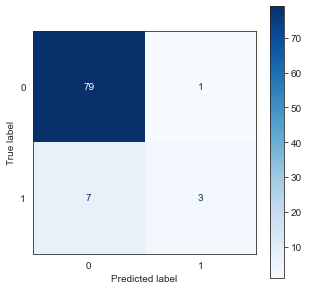

In [89]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### CAT Boost

In [90]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 886 ms


In [91]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.22%
Recall: 92.22%
Precision: 92.85%
F1-Score: 90.29%
time to train: 0.72 s
time to predict: 0.00 s
total: 0.72 s


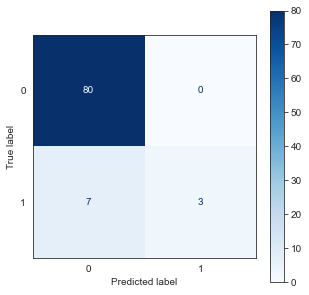

In [92]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### GradientBoost

In [93]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Learning rate set to 0.043615
0:	learn: 0.6677081	total: 159ms	remaining: 15.7s
1:	learn: 0.6481972	total: 162ms	remaining: 7.94s
2:	learn: 0.6284694	total: 165ms	remaining: 5.33s
3:	learn: 0.6109167	total: 168ms	remaining: 4.03s
4:	learn: 0.6007916	total: 170ms	remaining: 3.23s
5:	learn: 0.5844328	total: 172ms	remaining: 2.7s
6:	learn: 0.5679075	total: 174ms	remaining: 2.31s
7:	learn: 0.5497919	total: 177ms	remaining: 2.03s
8:	learn: 0.5332770	total: 179ms	remaining: 1.8s
9:	learn: 0.5201022	total: 180ms	remaining: 1.62s
10:	learn: 0.5062458	total: 182ms	remaining: 1.47s
11:	learn: 0.4944755	total: 183ms	remaining: 1.34s
12:	learn: 0.4816587	total: 184ms	remaining: 1.23s
13:	learn: 0.4643534	total: 185ms	remaining: 1.13s
14:	learn: 0.4540771	total: 186ms	remaining: 1.05s
15:	learn: 0.4438210	total: 187ms	remaining: 984ms
16:	learn: 0.4354305	total: 189ms	remaining: 921ms
17:	learn: 0.4267877	total: 190ms	remaining: 864ms
18:	learn: 0.4191911	total: 191ms	remaining: 813ms
19:	learn: 0.

In [94]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 0.38 s
time to predict: 0.01 s
total: 0.38 s


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


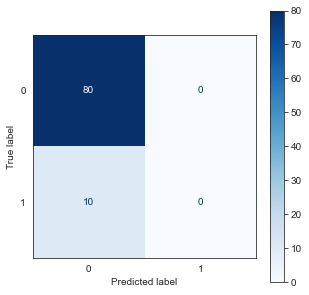

In [95]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
### LinearRegression

In [96]:
#%%time
from sklearn.linear_model import LinearRegression
start = time.time()
model0 = LinearRegression()
model0.fit(X_train,y_train)
end_train = time.time()
y_predictions = model0.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [98]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['LR'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

In [ ]:
### ExtraTree

In [99]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })